In [9]:
import os
import cv2
import pandas as pd
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
import random


In [6]:
base_path = r"D:\SEM 7\CVProject\pretraning_dataset"

# Splits
splits = ["train", "val", "test"]

data_summary = []

for split in splits:
    split_path = os.path.join(base_path, split)
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if not os.path.isdir(class_path):
            continue
        
        file_list = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        total_files = len(file_list)
        
        resolutions = []
        for f in tqdm(file_list, desc=f"Processing {split}/{class_name}", unit="img"):
            img_path = os.path.join(class_path, f)
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    h, w = img.shape[:2]
                    resolutions.append(f"{w}x{h}")
            except:
                pass
        
        res_count = Counter(resolutions)
        common_res = res_count.most_common(5)
        
        data_summary.append({
            "Split": split,
            "Class": class_name,
            "Total Files": total_files,
            "Unique Resolutions": len(res_count),
            "Most Common Resolutions": common_res
        })

# Convert to DataFrame
df_summary = pd.DataFrame(data_summary)

# Show summary
df_summary


Processing test/plastic: 100%|██████████| 221/221 [00:00<00:00, 1200.20img/s]


,Split,Class,Total Files,Unique Resolutions,Most Common Resolutions
0,train,not_plastic,1344,2,"[(512x384, 1113), (524x524, 231)]"
1,train,plastic,1030,19,"[(524x524, 921), (512x384, 39), (2448x3264, 27..."
2,val,not_plastic,288,2,"[(512x384, 239), (524x524, 49)]"
3,val,plastic,222,1,"[(512x384, 222)]"
4,test,not_plastic,286,2,"[(512x384, 180), (524x524, 106)]"
5,test,plastic,221,1,"[(512x384, 221)]"


In [8]:
BASE_PATH = r"D:\SEM 7\CVProject\pretraning_dataset"  # dataset root
SPLITS = ["train", "val", "test"]
ALLOWED_EXT = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp")
TARGET_SIZE = (524, 524)  # square resize

# === Choose overwrite or save copies ===
OVERWRITE = True  # set to False to save into a "resized_" copy

def list_images(folder):
    return [f for f in os.listdir(folder) if f.lower().endswith(ALLOWED_EXT)]

for split in SPLITS:
    split_path = os.path.join(BASE_PATH, split)
    if not os.path.isdir(split_path):
        continue
    
    for cls in os.listdir(split_path):
        class_path = os.path.join(split_path, cls)
        if not os.path.isdir(class_path):
            continue

        # If saving copies, create an output dir
        out_dir = class_path if OVERWRITE else os.path.join(class_path, "resized")
        if not os.path.exists(out_dir):
            os.makedirs(out_dir, exist_ok=True)

        files = list_images(class_path)
        for f in tqdm(files, desc=f"Resizing {split}/{cls}", unit="img"):
            in_path = os.path.join(class_path, f)
            out_path = os.path.join(out_dir, f)

            img = cv2.imread(in_path)
            if img is None:
                print(f"⚠️ Could not read {in_path}")
                continue

            resized = cv2.resize(img, TARGET_SIZE, interpolation=cv2.INTER_AREA)
            cv2.imwrite(out_path, resized)

            # If not overwriting, originals remain untouched
            if not OVERWRITE and in_path == out_path:
                print(f"⚠️ Skipped saving copy for {in_path} (paths overlap)")


Resizing test/plastic: 100%|██████████| 221/221 [00:00<00:00, 742.51img/s]



=== TRAIN ===


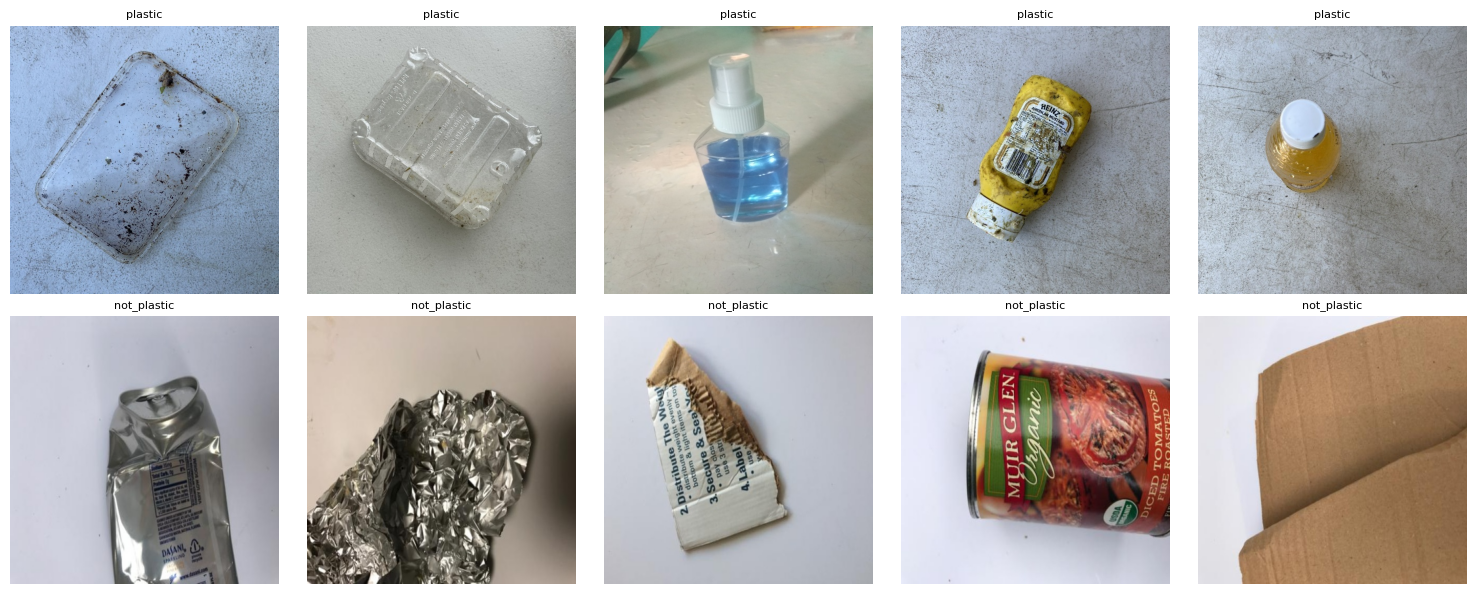


=== VAL ===


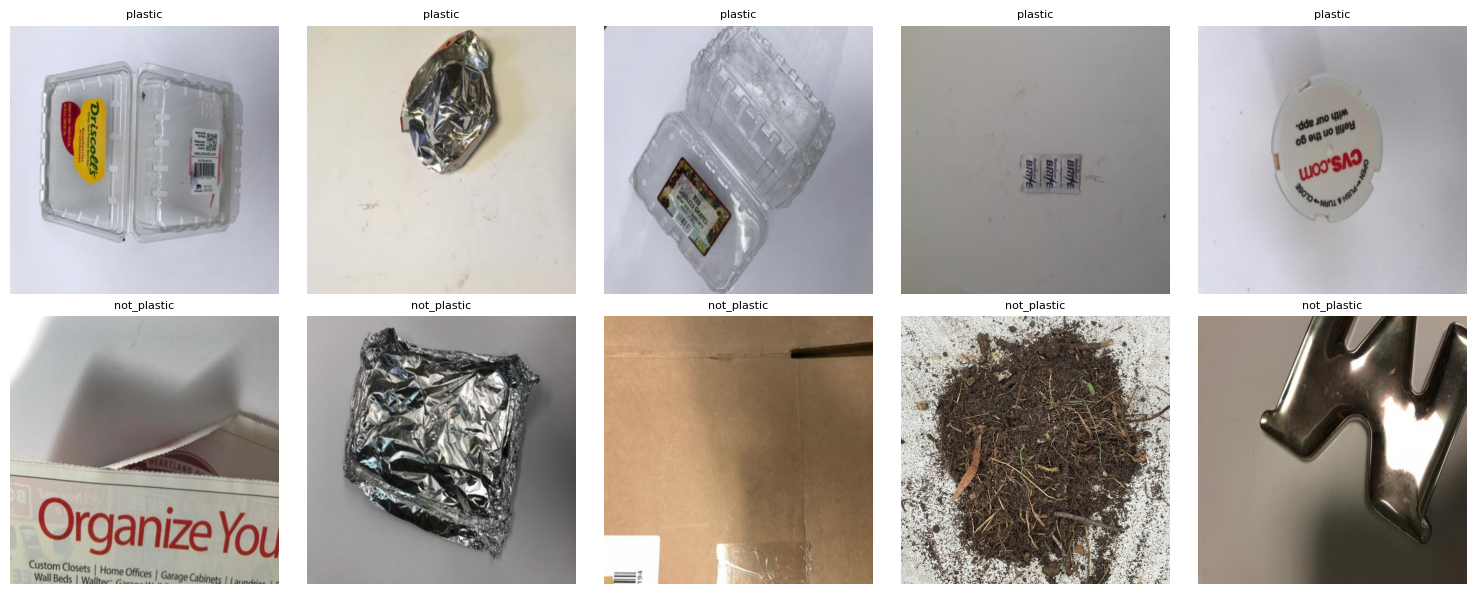


=== TEST ===


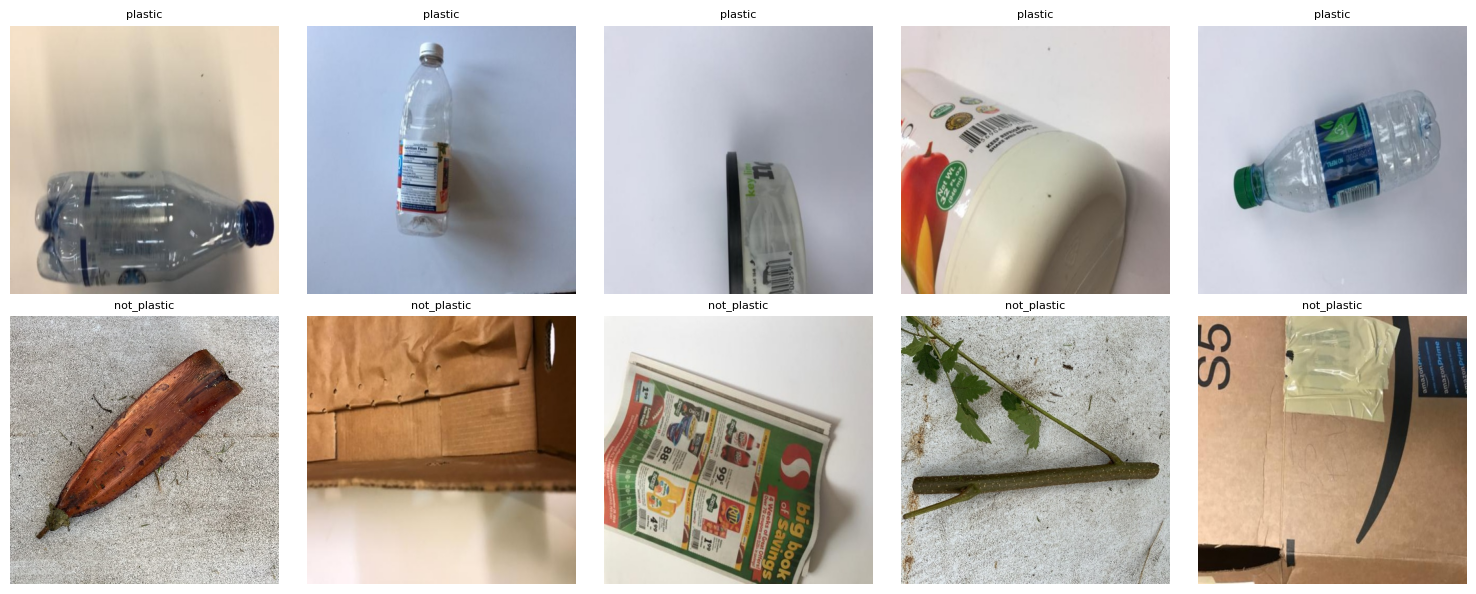

In [10]:
# === CONFIG ===
BASE_PATH = r"D:\SEM 7\CVProject\pretraning_dataset"
SPLITS = ["train", "val", "test"]
CLASSES = ["plastic", "not_plastic"]  # adjust if you have other class folder names
TARGET_SIZE = (524, 524)
SAMPLES_PER_CLASS = 5

def list_images(folder):
    return [os.path.join(folder, f) for f in os.listdir(folder)
            if f.lower().endswith(('.jpg','.jpeg','.png','.bmp','.tif','.tiff','.webp'))]

for split in SPLITS:
    print(f"\n=== {split.upper()} ===")
    fig, axes = plt.subplots(len(CLASSES), SAMPLES_PER_CLASS, figsize=(15, 6))
    
    for i, cls in enumerate(CLASSES):
        class_path = os.path.join(split, cls)
        full_path = os.path.join(BASE_PATH, class_path)
        
        if not os.path.isdir(full_path):
            print(f"⚠️ Skipping missing folder: {full_path}")
            continue
        
        files = list_images(full_path)
        sample_files = random.sample(files, min(SAMPLES_PER_CLASS, len(files)))
        
        for j, f in enumerate(sample_files):
            img = cv2.imread(f)
            if img is None:
                axes[i, j].axis("off")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert for matplotlib
            axes[i, j].imshow(img)
            axes[i, j].set_title(f"{cls}", fontsize=8)
            axes[i, j].axis("off")
    
    plt.tight_layout()
    plt.show()
